In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

df = pd.read_csv("nyc-jobs.csv")

df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-16T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-16T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-16T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-16T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-16T00:00:00.000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 28 columns):
Job ID                           3096 non-null int64
Agency                           3096 non-null object
Posting Type                     3096 non-null object
# Of Positions                   3096 non-null int64
Business Title                   3096 non-null object
Civil Service Title              3096 non-null object
Title Code No                    3096 non-null object
Level                            3096 non-null object
Job Category                     3094 non-null object
Full-Time/Part-Time indicator    2843 non-null object
Salary Range From                3096 non-null float64
Salary Range To                  3096 non-null float64
Salary Frequency                 3096 non-null object
Work Location                    3096 non-null object
Division/Work Unit               3096 non-null object
Job Description                  3096 non-null object
Minimum Qual Requirements    

In [3]:
Salary_df = df[['Business Title', 'Job Category', '# Of Positions', 'Salary Range From', 'Salary Range To', 'Salary Frequency']]
Salary_df = Salary_df.dropna()
Salary_df.head(10)

,Business Title,Job Category,# Of Positions,Salary Range From,Salary Range To,Salary Frequency
2,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,52,51907.68,54580.32,Annual
3,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,52,51907.68,54580.32,Annual
4,Temporary Painter,Maintenance & Operations,50,35.00,35.00,Hourly
5,Temporary Painter,Maintenance & Operations,50,35.00,35.00,Hourly
6,Contract Analyst,"Finance, Accounting, & Procurement",1,50598.00,85053.00,Annual
7,Associate Chemist,"Health Public Safety, Inspections, & Enforcement",1,50623.00,75083.00,Annual
8,Cost Estimating Manager,"Engineering, Architecture, & Planning",1,90000.00,110000.00,Annual
9,Assistant Project Manager,"Engineering, Architecture, & Planning",4,62942.00,92249.00,Annual
10,Assistant Project Manager,"Engineering, Architecture, & Planning",4,62942.00,92249.00,Annual
11,Office Manager,Clerical & Administrative Support,1,30683.00,49707.00,Annual


In [4]:
Salary_df = Salary_df[Salary_df['Salary Frequency'] != "Hourly"]
Salary_df.head()

,Business Title,Job Category,# Of Positions,Salary Range From,Salary Range To,Salary Frequency
2,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,52,51907.68,54580.32,Annual
3,Maintenance Worker - Technical Services-Heatin...,Maintenance & Operations,52,51907.68,54580.32,Annual
6,Contract Analyst,"Finance, Accounting, & Procurement",1,50598.00,85053.00,Annual
7,Associate Chemist,"Health Public Safety, Inspections, & Enforcement",1,50623.00,75083.00,Annual
8,Cost Estimating Manager,"Engineering, Architecture, & Planning",1,90000.00,110000.00,Annual


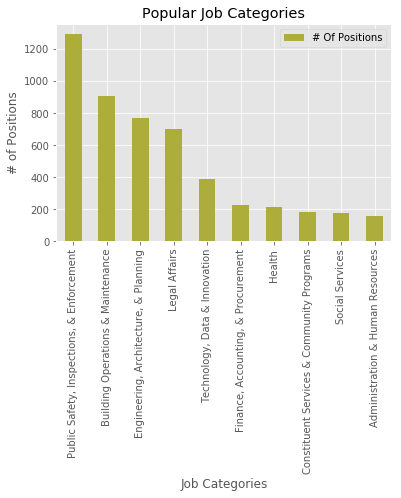

In [7]:
# What are the most popular job categories?
plt.style.use('ggplot')
vacancies = Salary_df.groupby(by='Job Category')['# Of Positions'].sum().sort_values(ascending=False)
vacancies_df = pd.DataFrame(data=vacancies)
#vacancies_df = vacancies_df.reset_index()
vacancies_df = vacancies_df.head(10)
#plt.figure(figsize=(10,10))
vacancies_df.plot.bar(color='#adad3b')
plt.title('Popular Job Categories')
plt.xlabel('Job Categories')
plt.ylabel('# of Positions')
plt.show()

In [6]:
Salary_df['Salary_Avg'] = Salary_df[['Salary Range From', 'Salary Range To']].mean(axis=1)
Salary_df = Salary_df.drop(['Salary Range From', 'Salary Range To'], axis=1)
Salary_df.drop_duplicates(subset=['Business Title'], keep=False,inplace=True)
#Salary_df = Salary_df.set_index('Business Title')
Salary_df.head(25)

,Business Title,Job Category,# Of Positions,Salary Frequency,Salary_Avg
7,Associate Chemist,"Health Public Safety, Inspections, & Enforcement",1,Annual,62853.0
8,Cost Estimating Manager,"Engineering, Architecture, & Planning",1,Annual,100000.0
17,"Clerical Associate, Bureau of Communicable Dis...",Clerical & Administrative Support,1,Annual,42033.5
20,"Clerical Associate, Bureau of Vital Statistics",Clerical & Administrative Support,1,Annual,42033.5
21,Application Support Reporting Specialist,Information Technology & Telecommunications,1,Annual,88593.0
25,Facilities Central Supervisor,Clerical & Administrative Support,1,Annual,42033.5
26,"Director, Infrastructure Build Coordinator",Information Technology & Telecommunications,1,Annual,74746.0
27,Paralegal Aide,Clerical & Administrative Support Legal,3,Annual,45694.5
38,311 Escalation Line Team Leader,Community & Business Services,4,Annual,46352.0
43,"Public Health Advisor, Bureau of Sexually Tran...",Health,1,Annual,47136.5


In [7]:
Salary_df.describe()

,# Of Positions,Salary_Avg
count,239.000000,239.000000
mean,1.606695,72151.102971
std,3.461086,24642.115491
min,1.000000,361.480000
25%,1.000000,52267.500000
50%,1.000000,70626.000000
75%,1.000000,89358.000000
max,49.000000,142500.000000


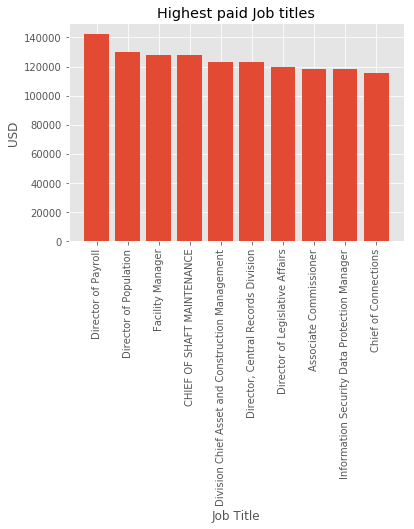

In [8]:
# What are the top 10 highest paid Job openings?
plt.style.use('ggplot')
Salary_df.sort_values(["Salary_Avg"], axis=0, ascending=[False],inplace=True)
#Salary_df.head(10)
plt.bar(Salary_df['Business Title'].head(10), Salary_df['Salary_Avg'].head(10))
plt.title('Highest paid Job titles')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('USD')
plt.show()

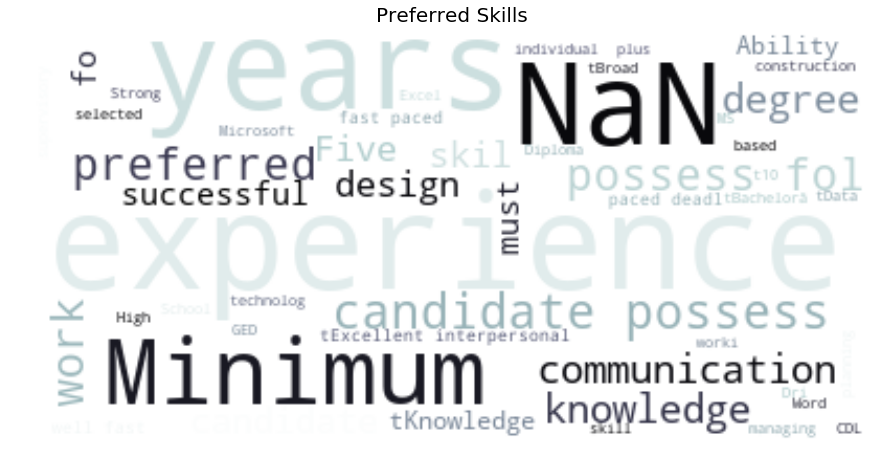

In [31]:
# What are the most common words used in Preferred Skills description?
from wordcloud import WordCloud
#STOPWORDS = stopwords
plt.figure(figsize=(15,15))


plt.imshow(WordCloud(background_color='white', colormap='bone', max_words=50).generate_from_text(str(df['Preferred Skills'])), interpolation='bilinear')
plt.axis('off')
plt.title('Preferred Skills', fontsize=20)
plt.show()